In [1]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib as mpl
import numpy as np

In [2]:
sym.init_printing(use_unicode=True)
%matplotlib inline
mpl.style.use('seaborn-talk')

In [3]:
x, t, z, = sym.symbols('x t z', real=True)
psi, phi,theta, pi, omega = sym.symbols('psi, phi theta, pi, omega', real=True)
alph1, alph2 = sym.symbols('\\alpha(\\theta), \\alpha(\\theta-1)', real=True)

c, rho, delta = sym.symbols('c, rho, delta', real=True, positive=True)

In [4]:
logit = sym.log(x) - sym.log(1 - x)

In [5]:
logistic = 1 / (1 + sym.exp(-x))

In [6]:
logit_rho, log_scale, log_both = sym.symbols('logit\_rho, log\_scale, log\_both')


In [7]:
log_scale

In [8]:
alph1

In [9]:
A_func = (rho * x / ( 1 + c * x)).xreplace({c: sym.exp(log_scale), rho:logistic.replace(x,logit_rho)}).simplify()

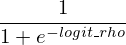

In [10]:
logistic.replace(x,logit_rho)

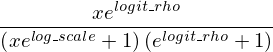

In [11]:
A_func

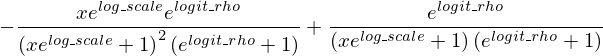

In [12]:
A_func.diff(x)

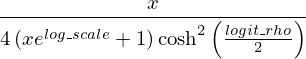

In [13]:
A_func.diff(logit_rho).simplify()

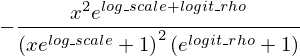

In [14]:
A_func.diff(log_scale).simplify()

In [15]:
B_func = sym.exp(log_both - log_scale) * sym.log(1 + sym.exp(log_scale) * x)

In [16]:
B_func

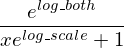

In [17]:
B_func.diff(x).simplify()

In [18]:
B_func.diff(log_both)

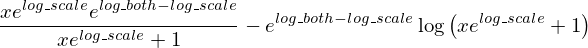

In [19]:
B_func.diff(log_scale)

In [20]:
alpha = psi * x - (1 - phi**2) * ( x**2 / 2)

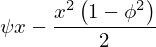

In [21]:
alpha

In [22]:
zeta1, zeta2 = sym.symbols('zeta_1, zeta_2')

In [23]:
psi_val = (phi / sym.sqrt( sym.exp(log_scale)  * (1 + logistic.replace(x, logit_rho))) 
                                        + ( 1- phi**2) *(zeta2 - sym.Rational(1/2)))

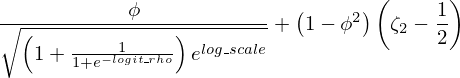

In [24]:
psi_val

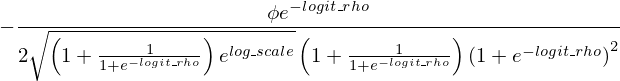

In [25]:
psi_val.diff(logit_rho)

In [26]:
beta_curvature = ( - ( 1 - ( 1- phi**2)) * logistic.replace(x,logit_rho) + 2 
                  * sym.exp(log_scale) * logistic.replace(x,logit_rho) * psi**2)


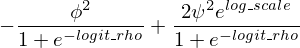

In [27]:
beta_curvature

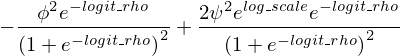

In [28]:
beta_curvature.diff(logit_rho)


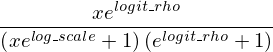

In [29]:
A_func

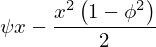

In [30]:
alpha

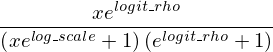

In [31]:
A_func

In [32]:
beta = A_func.replace(x, zeta1 + alpha.replace(x, zeta2 -1)) - A_func.replace(x, zeta1 + alpha.replace(x, zeta2))

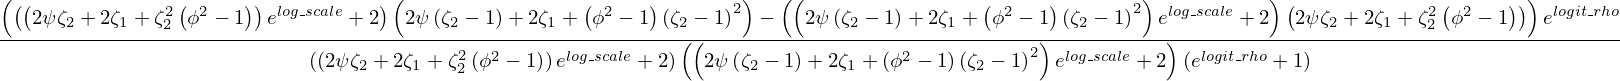

In [33]:
beta.simplify()

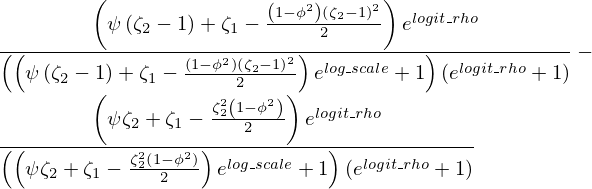

In [34]:
beta

In [35]:
gamma_curvature = - phi**2 * sym.exp(log_both) + sym.exp(log_both + log_scale) * psi**2

In [ ]:
gamma_curvature

In [ ]:
gamma_curvature.diff(log_both)

In [ ]:
gamma_curvature.diff(log_scale)

In [ ]:
gamma_curvature.diff(psi)

In [ ]:
logistic

In [ ]:
psi = (sym.exp(log_scale) * ( 1 + logistic.replace(x, logit_rho)))**(-sym.Rational(1,2)) * phi + (1 - phi**2) * (zeta2 - sym.Rational(1,2))

In [ ]:
psi

In [ ]:
psi.diff(log_scale).simplify()

In [ ]:
psi.replace(logistic.replace(x,logit_rho),rho).diff(rho)

In [ ]:
psi.diff(logit_rho).simplify()

In [ ]:
((sym.exp(-x) / ((1 + logistic) * ( 1 + sym.exp(-x))**2)) - logistic * (1-logistic)).simplify()

In [ ]:
((sym.exp(-logit_rho) / ((1 + logistic(logit_rho)) * ( 1 + 2 *  sym.exp(logit_rho)))).replace(logit_rho, x) - (logistic * ( 1 - logistic))).simplify()

In [ ]:
logistic

In [ ]:
.simplify()

In [ ]:
psi_with_num = psi.replace(rho,.9).replace(c,1)

In [ ]:
psi0_func = lambdify(phi, psi_with_num.args[0])
psi1_func = lambdify(phi, psi_with_num.args[1])

In [ ]:
fig1, ax1 = mpl.pyplot.subplots()
xvals = np.linspace(-1,1,100)
yvals = [psi0_func(x) for x in xvals]
ax1.plot(xvals, yvals)

In [ ]:
fig2, ax2 = mpl.pyplot.subplots()
xvals = np.linspace(-1,1,100)
yvals = [psi1_func(x) for x in xvals]
ax2.plot(xvals, yvals)

In [ ]:
b

In [ ]:
psi

In [ ]:
gamma = b.replace(x, -x + ( 1- phi**2))

In [ ]:
psi2 = sym.solveset(x * rho + gamma + x**2 * c**2 * omega / 2, x)

In [ ]:
psi2.replace(c,1)